
First countries to fall below the connectivity threshold:
Country Iceland - Iteration 124
Country Denmark - Iteration 127
Country Faroe Islands - Iteration 133
Country Netherlands - Iteration 133
Country Japan - Iteration 134

Last countries to fall below the connectivity threshold:
Country Grenada - Iteration 501
Country St. Vincent - Iteration 501
Country Guadeloupe - Iteration 501
Country Montserrat - Iteration 501
Country Antigua - Iteration 501
Country St. Lucia - Iteration 501
Country Saint Kitts and Nevis - Iteration 501
Country Suriname - Iteration 501
Country Barbados - Iteration 501
Country Anguilla - Iteration 501
Country Martinique - Iteration 501
Country Guyana - Iteration 501
Country Trinidad - Iteration 501
Country Dominica - Iteration 501
Country Madeira Islands - Iteration 501

First removed edges:
edge Metanode 13 <-> Metanode 14 (key=3)
edge Metanode 13 <-> Metanode 14 (key=4)
edge 566 <-> Metanode 13 (key=0)
edge 761 <-> Metanode 14 (key=0)
edge 62 <-> Metanode 123

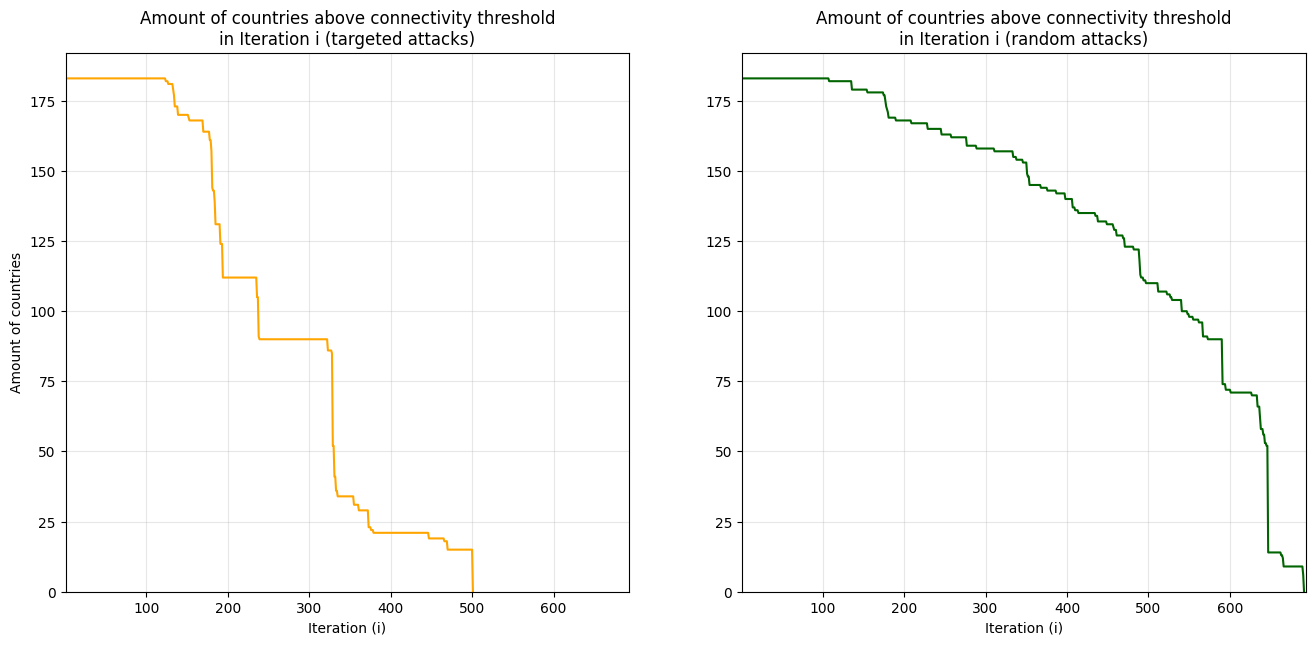

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

_DATAEXTR_DIR = "../../dataExtracted"

G = nx.read_graphml(str(_DATAEXTR_DIR + "/THE_MERGED_GRAPH.graphml"))

def metanodes(G, meta_key='meta'):
    return {n : d['country'] for n, d in G.nodes(data=True) if d.get(meta_key, False)}

def printResults(mode):

    # load data
    # --------------
    df_targeted = pd.read_csv(str(_DATAEXTR_DIR + f"/avg_{mode}_targeted.csv"))
    df_rel_targeted = (df_targeted / df_targeted.iloc[0]).copy()

    df_random = pd.read_csv(str(_DATAEXTR_DIR + f"/avg_{mode}_random.csv"))
    df_rel_random = (df_random / df_random.iloc[0]).copy()
    # --------------

    # plot amount of countries still above threshold
    # --------------
    countries_count_targeted = []
    for row in df_rel_targeted.iterrows():
        countries_count_targeted.append(sum(np.where(row[1] >= 0.5, 1, 0)))

    countries_count_random = []
    for row in df_rel_random.iterrows():
        countries_count_random.append(sum(np.where(row[1] >= 0.5, 1, 0)))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(16)

    ax1.plot(range(1, len(df_targeted)+1), countries_count_targeted, c= 'orange')
    ax2.plot(range(1, len(df_random)+1), countries_count_random, c= 'darkgreen')

    ax1.grid(alpha= 0.3)
    ax2.grid(alpha= 0.3)

    ax1.set_title(f"Amount of countries above {mode} threshold\nin Iteration i (targeted attacks)")
    ax2.set_title(f"Amount of countries above {mode} threshold\nin Iteration i (random attacks)")
    
    ax1.set_xlabel("Iteration (i)")
    ax2.set_xlabel("Iteration (i)")

    ax1.set_ylabel("Amount of countries")

    ax1.set_xlim(1, max(len(df_targeted)+2, len(df_random)+2))
    ax2.set_xlim(1, max(len(df_targeted)+2, len(df_random)+2))

    ax1.set_ylim(bottom= 0)
    ax2.set_ylim(bottom= 0)

    # --------------

    # metanode - country name dictionary + log files
    # --------------
    meta_dict = metanodes(G)

    dropout_file = _DATAEXTR_DIR + f"/dropouts_{mode}_targeted.txt"
    edges_file = _DATAEXTR_DIR + f"/iterations_{mode}_targeted.txt"

    last_iter = len(df_targeted)


    # first and last dropouts information
    # --------------
    first_dropouts = {}
    last_dropouts = []
    x = 5
    with open(dropout_file) as f:
        for i, l in enumerate(f):
            itr, info = l.split(": ")

            _, nb = itr.split()
            nb = int(nb)

            node = f"{info.split()[1]} {info.split()[2]}"

            if i < x:
                first_dropouts[meta_dict[node]] = nb
            
            elif nb == last_iter:
                last_dropouts.append(meta_dict[node])
    
    print(f"\nFirst countries to fall below the {mode} threshold:")
    for k, v in first_dropouts.items():
        print(f"Country {k} - Iteration {v}")

    print(f"\nLast countries to fall below the {mode} threshold:")
    for c in last_dropouts:
        print(f"Country {c} - Iteration {last_iter}")

    # first and last edges removed information
    # --------------
    first_edges = []
    last_edges = []
    y = 5
    with open(edges_file) as f:
        for i, l in enumerate(f):
            if i < y:
                itr, info = l.split(": ")
                info = info.strip("\n").strip("removing").strip()
                first_edges.append(info)
            elif i >= (last_iter-y):
                itr, info = l.split(": ")
                info = info.strip("\n").strip("removing").strip()
                last_edges.append(info)

    print(f"\nFirst removed edges:")
    for e in first_edges:
        print(e)
    
    print(f"\nLast removed edges:")
    for e in last_edges:
        print(e)
    # --------------






printResults("connectivity")